# Computational Social Science Project #3 
Group members: Shruti Bathia, Jessie Harney, Lawrence Liu & Alex Ramiller

Date: 11/20/2020

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter('ignore')
import random

After importing the necessary libraries, we read in the inspections data from 2011-2013 and the inspections data from 2014. The models will be trained on the 2011-2013 data, and we will later predict on the 2014 data. 

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv")

In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
#Get a sense for the levels of the categorical variables
print("Facility Types:", chicago_inspections_2011_to_2013["Facility_Type_Clean"].unique())
print("Inspection Types:", chicago_inspections_2011_to_2013["Inspection_Type"].unique())
print("Application Types:", chicago_inspections_2011_to_2013["APPLICATION_TYPE"].unique())

Facility Types: ['Other' 'Restaurant']
Inspection Types: ['Canvass']
Application Types: ['RENEW' 'ISSUE' nan 'C_LOC' 'C_EXPA']


In [6]:
# Drop column names related to geography, identification, variables with no variation, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                'License',
                                                'Facility_Type',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                'LICENSE_TERM_START_DATE',
                                                'LICENSE_TERM_EXPIRATION_DATE',
                                                'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                 'Inspection_Type', 
                                                'WARD',
                                                'PRECINCT',
                                                'WARD_PRECINCT',
                                                'POLICE_DISTRICT',
                                                'LICENSE_CODE',
                                                'LICENSE_DESCRIPTION', 
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

#assign inspection ID and the establishment name to be our index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

In [7]:
#let's take a look at our data
chicago_inspections_2011_to_2013.head()

,,Inspection_Date,Risk,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,APPLICATION_TYPE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,2013-01-31,Risk 3 (Low),Pass,Other,0,0,2,0,0,0,0,2.0,1,RENEW,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
507211,PANERA BREAD,2011-10-18,Risk 1 (High),Pass,Restaurant,0,0,3,0,0,0,0,2.0,1,RENEW,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
507212,LITTLE QUIAPO RESTAURANT,2011-10-18,Risk 1 (High),Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,RENEW,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
507216,SERGIO'S TAQUERIA PIZZA INC.,2011-10-19,Risk 1 (High),Pass,Restaurant,0,0,6,0,0,0,0,2.0,1,RENEW,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
507219,TARGET STORE # T-2079,2011-10-20,Risk 2 (Medium),Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,RENEW,2006-07-07,2018-02-15,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0


## Visualization

What do inspections look like over time?

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

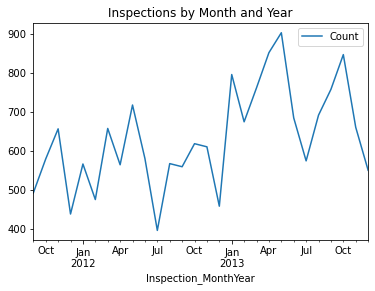

In [8]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type_Clean': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

What do the results look like? 

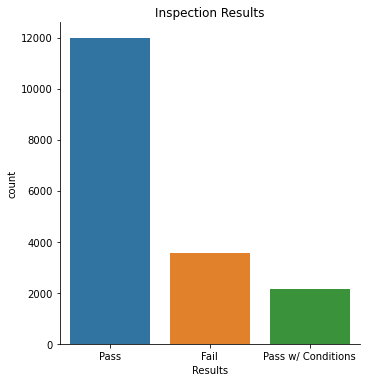

In [9]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

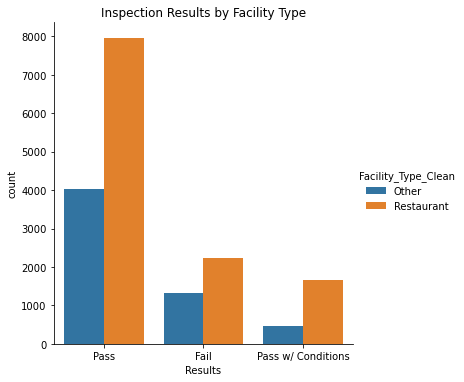

In [10]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

Now that we have a sense for what is included in the dataset, we prepare the data for model fitting. We begin by dropping variables related to the date of inspection and dummify the categorical variables in the dataset. Additionally, we convert the target variable ("Results") into a binary variable. Instead of having Pass, Pass with Conditions, and Fail, we treat Pass and Pass with Conditions the same. Reducing the number of possible classes will be less computationally intensive without hindering our ability to predict the establishments likely to fail an inspection. 

In [11]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

# Binarize the results variable, and treat Pass and Pass w/ Conditions the same.
chicago_inspections_2011_to_2013["Results"] = chicago_inspections_2011_to_2013['Results']
chicago_inspections_2011_to_2013["Results"] = chicago_inspections_2011_to_2013["Results"].replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
chicago_inspections_2011_to_2013["Results"]  = lb_style.fit_transform(chicago_inspections_2011_to_2013["Results"])
# Recode 0s and 1s so 1s are "Fail"
chicago_inspections_2011_to_2013["Results"] = np.where(chicago_inspections_2011_to_2013["Results"] == 1, 0 ,1)

#Dummify remaining categorical variables
chicago_inspections_2011_to_2013 = pd.get_dummies(chicago_inspections_2011_to_2013)


In [12]:
chicago_inspections_2011_to_2013.head()

,,Results,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,0,2,0,0,0,0,2.0,1,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,0,3,0,0,0,0,2.0,1,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,1,0,2,6,0,0,0,0,2.0,1,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,0,6,0,0,0,0,2.0,1,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,0,1,0,0,0,1
507219,TARGET STORE # T-2079,1,0,2,6,0,0,0,0,2.0,1,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,0,1,0,0,0,1


### Dividing Data into Training and Validation Sets

After preprocessing our data, we divide the data into training and validation sets. The validation set will give us a sense for how well our model does on out-of-sample data. We do *not* create a test set at this time since we will treat the unlabeled 2014 data as our test set.

In [13]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])

In [14]:
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,0,1,0,0,0,1
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,0,1,0,0,0,1


In [15]:
#split data into train and validate datasets
X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size = 0.8, test_size = 0.2,
                                           stratify=y, random_state = 10)

In [16]:
#Scale features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.fit_transform(X_validate)

## Fit Models

Now that we have preprocessed our data, we can fit potential models to the data. We decided to fit a random forest classifier, a support vector classifier, and logistic regression. 

### Model 1: Random Forest

A random forest consists of a large number of decision trees that operate as an ensemble. Each individual tree gives a class prediction, and the class with the most votes becomes the model’s prediction. By operating as a large committee of uncorrelated trees (thanks to the random splitting), the random forest will likely outperform any individual constituent models. In other words, the individual trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). In order to implement random forest, there needs to be some actual signal in our features so that models built using those features do better than random guessing. One con of the random forest is that it is computationally expensive. Additionally, although we are able to plot feature importances, it is difficult to interpret or visualize the forest of trees. 

In addition to the general strengths of random forest as a classification algorithm, random forest is an especially plausible choice for this problem since we have a mix of binary and numerical features, random forest tends to handle unbalanced data well, and it is robust to outliers and non-linear data.

In [17]:
## Hyperparemter Tuning
## Note! Not all possible parameters included due to computation time!
## We also reduce the possible values taken on by the hyperparameters due to computation time!]
## Note also that Lawrence forget to set a random_state. We realized too close to the deadline and did 
## not want to risk re-running with random_state given the computational time required. 

# Function to measure the quailty of the split
criterion = ['gini', 'entropy']
# Number of trees in random forest
n_estimators = list(np.arange(50,150,25))
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = list(np.arange(2,5,1)) 
# Minimum number of samples required to split a node
min_samples_split = list(np.arange(2,5,1)) 
# Minimum number of samples required at each leaf node
min_samples_leaf = list(np.arange(1, 5, 1))
# Node will be split if split induces decrease of impurity greater than or equal to this value
min_impurity_decrease = list(np.arange(0,0.10,0.01)) 

# Create the random grid
param_grid = {'criterion': criterion, 
              'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'min_impurity_decrease': min_impurity_decrease}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_grid = GridSearchCV(rf,param_grid, cv = 3, n_jobs= -1, verbose = 2)
rf_grid.fit(X_train_scaled, y_train)

best_index = np.argmax(rf_grid.cv_results_["mean_test_score"])

print(rf_grid.cv_results_["params"][best_index])

Fitting 3 folds for each of 8640 candidates, totalling 25920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [19]:
best_rf = RandomForestClassifier(**rf_grid.cv_results_["params"][best_index])

rf_fit = best_rf.fit(X_train_scaled, y_train)

y_predRF= rf_fit.predict(X_validate_scaled)

## Model 2: Support Vector Classifier

The objective of the support vector classifier is to find a hyperplane in an N-dimensional space (N being the number of features) that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. 

SVC is particularly effective in higher dimensions and when the number of features exceed the training examples. It is the best algorithm when classes are separable and the outliers have less impact. SVC is suited for extreme case binary classification. Some drawbacks of SVC are that it requires a large amount of time to process especially if the dataset is large. It does not perform well in the case of overlapped classes, and selecting the appropriate kernel function can be tricky.

In [20]:
## Hyperparemter Tuning
## Note! Not all possible parameters included due to computation time!

# Choice of regularization parameter (must be strictly positive, larger values of C indicate
# weaker regularization strength)
C = list(np.arange(0.1,2.1,0.5))
# Kernel type
kernel = ['linear', 'poly', 'rbf'] 
# Kernel coefficient specification 
gamma = ['auto', 'scale']
# Whether to apply the shrinking heuristic
shrinking = [True, False]
# Maximum number of iterations
max_iter = list(np.arange(1000, 10000, 1000))

# Create the random grid
param_gridSVM = {'C': C, 
              'kernel': kernel,
               'gamma': gamma,
               'shrinking': shrinking,
               'max_iter': max_iter}

# create a model
svm = SVC()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
svm_grid = GridSearchCV(svm, param_gridSVM, cv = 3, n_jobs= -1, verbose = 2)
svm_grid.fit(X_train_scaled, y_train)

best_indexSVM = np.argmax(svm_grid.cv_results_["mean_test_score"])

print(svm_grid.cv_results_["params"][best_indexSVM])

best_svm = SVC(**svm_grid.cv_results_["params"][best_indexSVM])

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 32.2min finished


{'C': 0.6, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': 4000, 'shrinking': True}


In [21]:
svm_grid.cv_results_["params"][best_indexSVM]

{'C': 0.6,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': 4000,
 'shrinking': True}

In [22]:
# Fit the best SVC model
svm_fit = best_svm.fit(X_train_scaled, y_train)

# Predicted outcome from best SVM (with hypertuned parameters)
y_predSVM = svm_fit.predict(X_validate_scaled)

## Model 3: Logistic Regression

Logistic regression is a classification algorithm used to find the probability of event success and event failure. It learns a linear relationship from the given dataset and then introduces a non-linearity in the form of the Sigmoid function to categorize data into discrete classes. Logistic regression is easier to implement, interpret, and very efficient to train. With respect to interpretability, it not only provides a measure of how appropriate a predictor(coefficient size) is, but also the predictor's direction of association (positive or negative).

Logistic regression makes no assumptions about distributions of classes in feature space; however, logistic regression does require no multicollinearity, as well as linearity of the relationship between factors and the log odds for our outcome of interest, in addition to the typical independent and identically distributed assumption. 

Some pros of logistic regrression include good accuracy for many simple data sets and high performance when the dataset is linearly separable. Additionally, it can interpret model coefficients as indicators of feature importance. Although logistic regression is less inclined to over-fitting, if the number of observations is less than the number of features, logistic regression should not be used; otherwise, it may lead to overfitting.

Applied here, however, logistic regression has a number of benefits. Logistic regression works well with dichotomous variables and our target is dichotomous. Additionally, it is highly interpretable and has a relatively quick computational time. If we assume a relatively linear relationship between the features and target, it will also work especially well. 

In [23]:
# Hyperparameter Tuning

# Choice of regularization parameter (must be strictly positive, larger values of C indicate
# weaker regularization strength)
C = list(np.arange(0.1,2.1,0.5))
# Optimization algorithm 
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# Whether to fit intercept
fit_intercept = [True, False]
# Maximum number of iterations
max_iter = list(np.arange(1000, 10000, 1000))

# Create the random grid
param_grid_log_reg = {'C': C, 
               'solver': solver,
               'fit_intercept': fit_intercept,
               'max_iter': max_iter}

# create a model
log_reg = LogisticRegression()

# Random search of parameters, using 3 fold cross validation, 
log_reg_grid = GridSearchCV(log_reg, param_grid_log_reg, cv = 3, n_jobs= -1, verbose = 2)
log_reg_grid.fit(X_train_scaled, y_train)

best_index_log_reg = np.argmax(log_reg_grid.cv_results_["mean_test_score"])

print(log_reg_grid.cv_results_["params"][best_index_log_reg])

best_log_reg = LogisticRegression(**log_reg_grid.cv_results_["params"][best_index_log_reg])

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.0min finished


{'C': 0.6, 'fit_intercept': True, 'max_iter': 1000, 'solver': 'liblinear'}


In [24]:
# fit the model
log_model = best_log_reg.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_validate_scaled)

## Validation Metrics

We begin by visualizing the confusion matrices for each of our three classifer models: random forest, SVC, and logistic regression. First, we provide confusion matrices for each of the three models so that we have a sense for how each model did at classifying true positives, true negatives, false negatives, and false positives among the validation data. Since a "positive" in our case is a failed inspection, a "true positive" is predicting a failed inspection for a location that in fact received a failed inspection, a "true negative" is predicting a passing inspection for a location that in fact recieved a passing inspection, and so on. Note that we examine how well our model did on the validation data since we are ultimately interested in how well the model performs on out-of-sample data. 

### Random Forest Confusion Matrix

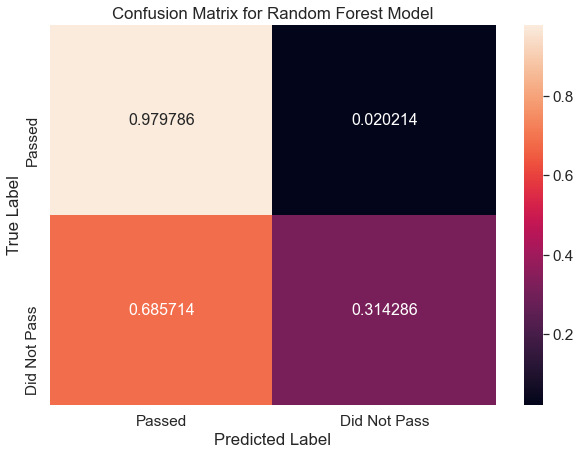

In [25]:
# Create a confusion matrix with our validated and predicated outcome
cf_matrixRF = confusion_matrix(y_validate, y_predRF, normalize = "true")

# Create a pandas dataframe version of the confusion matrix
df_cmRF = pd.DataFrame(cf_matrixRF, range(2), range(2))

df_cmRF = df_cmRF.rename(index=str, columns={0: "Passed", 1: "Did Not Pass"})
df_cmRF.index = ["Passed", "Did Not Pass"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cmRF, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### SVC Confusion Matrix

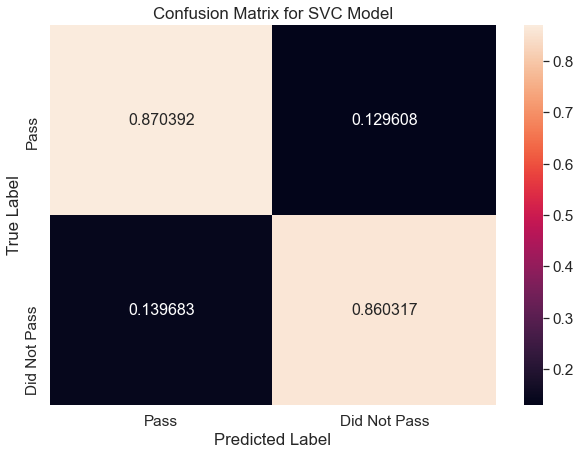

In [26]:
# Create a confusion matrix with our validated and predicated outcome
cf_matrixSVC = confusion_matrix(y_validate, y_predSVM, normalize = "true")

# Create a pandas dataframe version of the confusion matrix
df_cmSVC = pd.DataFrame(cf_matrixSVC, range(2), range(2))

df_cmSVC = df_cmSVC.rename(index=str, columns={0: "Pass", 1: "Did Not Pass"})
df_cmSVC.index = ["Pass", "Did Not Pass"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cmSVC, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix for SVC Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Logistic Regression Confusion Matrix

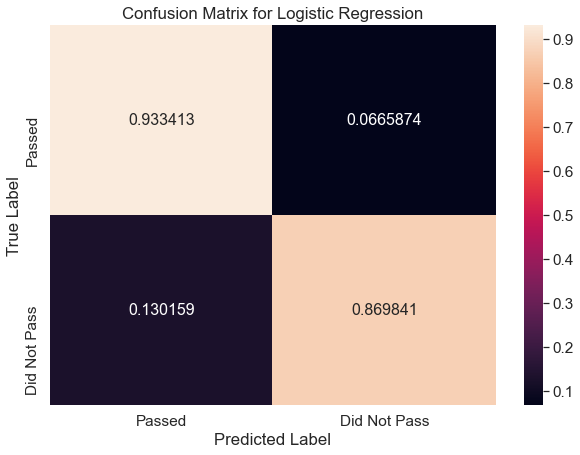

In [27]:
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Passed", 1: "Did Not Pass"})
df_cm.index = ["Passed", "Did Not Pass"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

While the confusion matrices provide an intuitive sense for which models performed better on our validation set, we now turn to specific validation metrics. Below, we print the accuracy, precision, recall, and F1 scores for each model. 

In [28]:
for model in [best_rf,best_svm,best_log_reg]:
    print(str(model))
    for score in ['accuracy','precision','recall','f1']:
        output = cross_val_score(model, X_train_scaled, y_train, scoring=score)
        print(score + ": " + str(output.mean()))
    print("")

RandomForestClassifier(criterion='entropy', max_depth=4)
accuracy: 0.8702734525159965
precision: 0.8216433769953083
recall: 0.47063492063492063
f1: 0.5378131754072051

SVC(C=0.6, gamma='auto', kernel='linear', max_iter=4000)
accuracy: 0.9232418451279159
precision: 0.7505109815659583
recall: 0.9242063492063493
f1: 0.8280064082276913

LogisticRegression(C=0.6, max_iter=1000, solver='liblinear')
accuracy: 0.9237175951114928
precision: 0.7864147894456648
recall: 0.8488095238095237
f1: 0.8163325140844762



## Policy Simulation

Before running our policy simulation, we can get a sense for the effects that different features might be having on our classification outcomes. Now that we have tuned the hyperparameters and fit the models, we can see which features contributed most to the classification (for random forest and SVC), or which features have the largest coefficients (logit). Across models, serious count seems to be the most relevant feature.

### Random Forest Feature Importance Plot

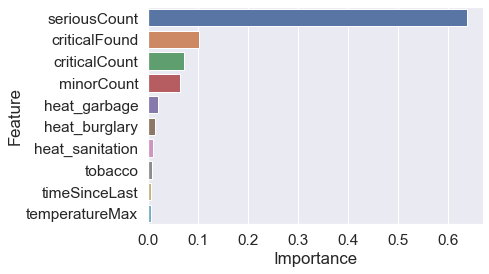

In [29]:
import seaborn as sns

feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_fit.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

### SVC Feature Importance Plot

<AxesSubplot:>

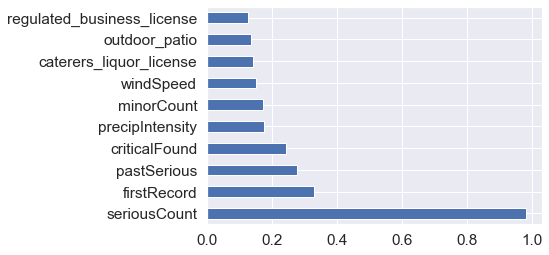

In [30]:
# Cannot do the same type of feature selection for SVM, but can do this! 
# Source: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
pd.Series(abs(svm_fit.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

### Logistic Regression Coefficient Plot

In [31]:
logit_data = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(log_model.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

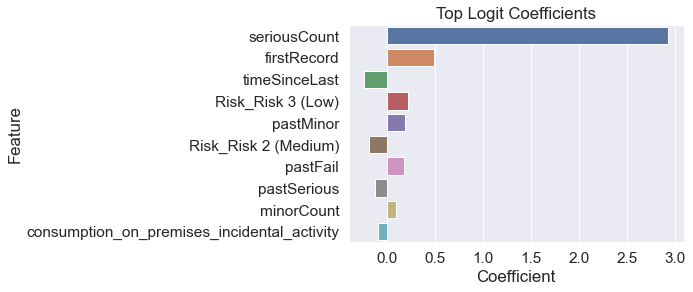

In [32]:
sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

Which validation metric should we prioritize? F1 seems promising since we arguably care about both precision and recall. Among those two, we would prioritize recall slightly more. We are dealing with a resource constraint problem, and we are most interested in preventing false negatives. Given that we have a limited number of audits and we want to make sure that we are not letting institutions that would otherwise fail off the hook), we want to ensure that our audits are used on failing institutions but we  especially don't want our algorithim to predict that an institution passed when it did not (false negative). 

Precision is helpful when the cost of a false positive is high (i.e., if we feel that the cost of an establishment being predicted to fail the inspection but not failing is high). Instead, we here prioritize recall, which is helpful to utilize as a metric when the cost of a false negative is high. In our case, it’s likely a bit more costly or risky to have false negatives (i.e., when our model predicts that this establishment should not be inspected, but in reality, would fail.) 

In either case (prioritizing recall or priortizing F1), the SVC performs the best among our three models. For our policy simiulation below, we thus choose to predict using the SVC. It is interesting to note that the random forest performed best at predicting true negatives, but that is not what we are most interested in here.

## Prioritize Audits

Having decided that the SVC would be the best of our three models on our validation metric of interest (recall and F1), we run an audit simulation. First, we order the audits by the SVC's probability of detecting a "Fail" score. Second, we plot the distribution of pass/fail among the first 1000 observations in the dataset. For comparison, we then simulate random audits on the 2011-2013 dataset by picking 1000 observations at random. 

In [33]:
#Apply the SVC model to the training data and order the dataset based on the likelihood of a fail score
best_svm = SVC(**svm_grid.cv_results_["params"][best_indexSVM], probability=True)

X_scaled = scaler.fit_transform(X)

prediction = best_svm.fit(X_scaled, y).predict(X_scaled)
probs = best_svm.fit(X_scaled, y).predict_proba(X_scaled)[:,1]

audit_table = chicago_inspections_2011_to_2013

audit_table["predict"] = prediction
audit_table["probs"] = probs

audit_table.sort_values("probs", ascending = False)

,,Results,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW,predict,probs
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1227765,VAUGHAN'S,1,1,5,4,0,0,0,0,2.0,1,10.117808,0,0,0,0,0,1,0,0,0,0,0,0,0.000230,28.666667,15.240000,0.660000,26.558617,40.489468,70.920674,1,1,0,0,0,1,0,0,0,1,1,1.000000e+00
1174311,"LA NUEVA IMAGEN GROCERY, INC.",1,0,4,8,0,0,0,0,2.0,1,4.712329,0,1,0,0,0,1,0,0,0,0,0,0,0.000233,81.086667,8.800000,0.616667,19.632207,32.424804,10.594237,0,1,0,0,1,0,0,0,0,1,1,1.000000e+00
519291,THRIFTY FOOD,1,0,4,5,0,0,0,0,2.0,1,9.205479,0,1,0,0,0,1,0,0,0,0,0,0,0.001643,59.133333,12.723333,0.683333,27.353937,3.104436,30.810826,0,0,1,0,1,0,0,0,0,1,1,1.000000e+00
1335679,FRIENDSHIP ON THE LAKE,1,4,5,2,0,0,0,0,2.0,1,2.947945,1,0,0,0,0,0,0,0,0,0,0,0,0.011663,79.643333,9.630000,0.596667,3.397252,0.379305,0.241419,1,1,0,0,0,1,0,0,0,1,1,1.000000e+00
1285737,FLAME N HOT CONVENIENCE,1,1,4,3,0,0,0,0,2.0,1,1.421918,0,0,0,0,0,1,0,0,0,0,0,0,0.002080,69.493333,11.066667,0.713333,39.975206,36.616541,5.636053,1,0,0,1,1,0,0,0,1,0,1,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326725,"PALETERIA OSO POLAR, INC",0,0,0,6,0,0,0,0,2.0,1,1.654795,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,41.446667,10.126667,0.436667,38.987767,14.082854,24.454468,0,0,1,0,0,1,0,0,1,0,0,2.232183e-06
1198224,Chizakaya,0,0,0,3,0,0,0,0,2.0,1,1.706849,1,0,0,0,0,0,0,0,0,0,0,1,0.000277,47.926667,15.516667,0.623333,14.479836,17.726711,27.758034,0,1,0,0,0,1,0,0,1,0,0,2.213330e-06
1343271,DELICIAS ICE CREAM,0,0,0,2,0,0,0,0,2.0,1,2.147945,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,75.073333,10.230000,0.450000,20.101032,58.244978,39.207811,0,1,0,0,0,1,0,0,0,1,0,1.797844e-06


In [34]:
audit_table_Top1000 = audit_table.sort_values("probs", ascending=False).head(1000)

print("Proportion of Failed Inspections in Top 1000", audit_table_Top1000['Results'].mean())

#set random seed
random.seed(30)

audit_table_Random1000 = audit_table.sample(1000)

print("Proportion of Failed Inspections in Random 1000", audit_table_Random1000['Results'].mean())

Proportion of Failed Inspections in Top 1000 0.921
Proportion of Failed Inspections in Random 1000 0.222


Text(0.5, 0, 'Results (Random)')

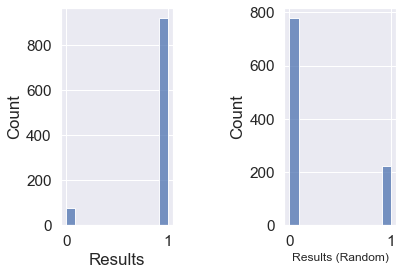

In [40]:
fig = plt.figure()
fig.subplots_adjust(hspace=2, wspace=1)

ax = fig.add_subplot(1, 2, 1)
sns.histplot(audit_table_Top1000['Results'], ax = ax)
ax = fig.add_subplot(1, 2, 2)
sns.histplot(audit_table_Random1000['Results'], ax = ax)
plt.xlabel('Results (Random)', size=12)

In [35]:
#Recall calculation

TP_Top1000 = len(audit_table_Top1000[(audit_table_Top1000['Results'] == 1) & (audit_table_Top1000['predict'] == 1)])
FN_Top1000 = len(audit_table_Top1000[(audit_table_Top1000['Results'] == 1) & (audit_table_Top1000['predict'] == 0)])
recall_Top1000 = TP_Top1000/(TP_Top1000+FN_Top1000)

TP_Random1000 = len(audit_table_Random1000[(audit_table_Random1000['Results'] == 1) & (audit_table_Random1000['predict'] == 1)])
FN_Random1000 = len(audit_table_Random1000[(audit_table_Random1000['Results'] == 1) & (audit_table_Random1000['predict'] == 0)])
recall_Random1000 = TP_Random1000/(TP_Random1000+FN_Random1000)

print("Recall (Top 1000): " + str(recall_Top1000))
print("Recall (Random 1000): " + str(recall_Random1000))

Recall (Top 1000): 1.0
Recall (Random 1000): 0.8783783783783784


For the top 1000 institutions, all of the instances in which the institutions failed the inspection were correclty predicted. We recognize this does not account for false positives (i.e., cases in which predicted positive cases are *wrong*). Given that, we also look at the precision metric, even though we still believe that prioritizing recall is preferable for this particular policy problem. 

In [36]:
#Precision calculation

TP_Top1000 = len(audit_table_Top1000[(audit_table_Top1000['Results'] == 1) & (audit_table_Top1000['predict'] == 1)])
FP_Top1000 = len(audit_table_Top1000[(audit_table_Top1000['Results'] == 0) & (audit_table_Top1000['predict'] == 1)])
precision_Top1000 = TP_Top1000/(TP_Top1000+FP_Top1000)

TP_Random1000 = len(audit_table_Random1000[(audit_table_Random1000['Results'] == 1) & (audit_table_Random1000['predict'] == 1)])
FP_Random1000 = len(audit_table_Random1000[(audit_table_Random1000['Results'] == 0) & (audit_table_Random1000['predict'] == 1)])
precision_Random1000 = TP_Random1000/(TP_Random1000+FP_Random1000)

print("Precision (Top 1000): " + str(precision_Top1000))
print("Precision (Random 1000): " + str(precision_Random1000))

Precision (Top 1000): 0.921
Precision (Random 1000): 0.6701030927835051


Precision among the prioritized audits is also much higher than the randomized audits. For good measure, we also calculate and compare the F1 scores. 

In [37]:
## F1 Calculation

F1_Top1000 = 2 * (precision_Top1000 * recall_Top1000)/(precision_Top1000 + recall_Top1000)
F1_Random1000 = 2 * (precision_Random1000 * recall_Random1000)/(precision_Random1000 + recall_Random1000)

print("F1 (Top 1000): " + str(F1_Top1000))
print("F1 (Random 1000): " + str(F1_Random1000))

F1 (Top 1000): 0.9588755856324831
F1 (Random 1000): 0.7602339181286549


As demonstrated by the validation metrics, prioritizing audits based on our SVC algorithim performs significanlty better than random audits. To further emphasize this point, we plot the difference true failed inspections between the prioritized audits and the randomized audits below.

### Predict on Data with Unseen Labels

We end by predicting the labels for the 2014 dataset using our SVM model developed on the 2011-2013 data.

In [48]:
#take a look at 2014 data
chicago_inspections_2014.head()

,Inspection_ID,DBA_Name,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW,predict
0,920445,SUBWAY,2,0,0,0,0,0,0,0.794521,0,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,12.034833,7.194320,1.219222,1,1,0,0,0,1,0,0,1,0,0
1,920446,SHARKS FISH & CHICKEN,0,0,6,0,0,0,2,0.660274,0,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,26.292725,27.837325,12.401466,0,0,1,0,0,1,0,0,0,1,0
2,920448,P K PETRO INC.,0,1,7,0,0,0,0,2.000000,1,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.30,7.653333,0.636667,49.468944,11.282325,66.467028,0,0,0,1,1,0,0,0,0,1,0
3,920449,"Z T DOLLAR EXCHANGE,INC",1,2,5,0,0,0,0,2.000000,1,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.939833,26.695701,76.827119,1,0,0,1,1,0,0,0,1,0,1
4,920450,KENNEDY FISH & CHICKEN,0,1,7,0,0,0,3,0.964384,0,3.304110,0,0,0,0,0,0,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.662066,27.638311,78.175677,0,1,0,0,0,1,0,0,0,1,1


In [49]:
# Prepare the Chicago 2014 data (repeated generally the same process as above for the 2011-2013 data,)
# except for the 'Results' specific code or dropping variables, since we're just using those that were in the
# Chicago 2011-2013 data. 

#assign inspection ID and the establishment name to be our index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

# Convert the Inspection Date to a datetime format
#chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'], infer_datetime_format=True)

#Dummify remaining categorical variables
chicago_inspections_2014 = pd.get_dummies(chicago_inspections_2014)

In [50]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & X.columns]

A quick scan of the columns in the 2014 dataset and the 2011-2013 dataset show the same columns in both. 

In [51]:
print("Dimensions of X Test Data: ", X_test.shape)
print("Dimensions of X Data (Training and Validation): ", X.shape)

Dimensions of X Test Data:  (4128, 39)
Dimensions of X Data (Training and Validation):  (15764, 39)


In [52]:
X_test = X_test.dropna()

In [53]:
#no change in X test
X_test.shape

(4128, 39)

We then predict on the unlabeled 2014 dataset based on the SVC model fit on the 2011-2013 data. 

In [54]:
X_test_scaled = scaler.fit_transform(X_test)
predictions_2014=best_svm.predict(X_test_scaled)

In [55]:
output2014 = X_test
output2014["predict"] = predictions_2014

In [56]:
# Predictions for 2014 data outputted to the data folder in our repo
output2014.to_csv("data/Chicago Inspections 2014.csv")

## Discussion Questions

### 1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?

When we think about the different kinds of metrics, the choice really depends on the requirements of the problem at hand. The appropriate validation metrics may vary across different policy problems or social scientific research questions. Accuracy is the ratio of the units of correct predictions and total number of predictions made by the classifiers. However, accuracy doesn’t give us the best picture of the cost of misclassification or help us mitigate the costs related to an unbalanced testing data set. For instance, in email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model. In this situation precision can be more useful than accuracy.  Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative. For instance, if a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank. F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall and there is an uneven class distribution (large number of Actual Negatives).

### 2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

If establishments learned the algorithm, they might alter their behavior to avoid being audited. For example, it is possible that some places could attempt to change what type of establishment they are. Let's say an establishment is a bar and served food--maybe they would scale back to only serve drinks and just have food trucks stationed outside of bars. This is simialr to what happens in California today. Establishments may be able to avoid detection while still providing a similar service, but likely not sacrificing profits and also not really changing their actual behavior.

Moerover, some features might lend themseles more easily to behaviorial adjustments. If our algorithm finds tobacco consumption is a highly predictive feature of the model, the establishments might change their tobacco consumption policy. If the establishments learn that we are using the amount of water consumption as one of the features in the model, they might just bump up their water consumption but not really improve their sanitation habits. In our case, it looks like "Serious Count" is highly predictive. If the establihsment is told they have received a lot of "Serious Counts," they may alter their behavior  to reduce the number of Serious Counts. 

To properly think about this potential problem, we should make sure we understand what features are being used in the algorithm and the context behind those features. One solution to avoid having establishments game the audit system might be to consider making the algorithm private. Although this raises justifiable concerns about transparency, it might help us avoid preemptive behavioral changes. That said, if the predictive features incent behavior change that makes the estbalishments safer, we might not actaully mind that the establishments are preemptively altering their behavior in response to the algorithm. In other words, as long as the establishments cannot pretend to be safer when they actually are not, then adjusting their behvaior may actually be desriable. If this happened, we would not only be auditing establishments more likely to have failed, but we are also encouraging potentially failing establishments to change their behaviors pre-audit.

Not knowing how the features are measured makes more specific discussion difficult. However, if we have measures that are reliable for predicting actual safety behavior (not just outcome) and utilize those, we might be able to encourage actual behavior change that we want to see.